CS551G Data Mining and Visualisation <br>
Coursewrok 1: Part 1 <br>
K-means Clustering <br>
Work by Philip Tsvetanov <br>

In [28]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

<function matplotlib.pyplot.show>

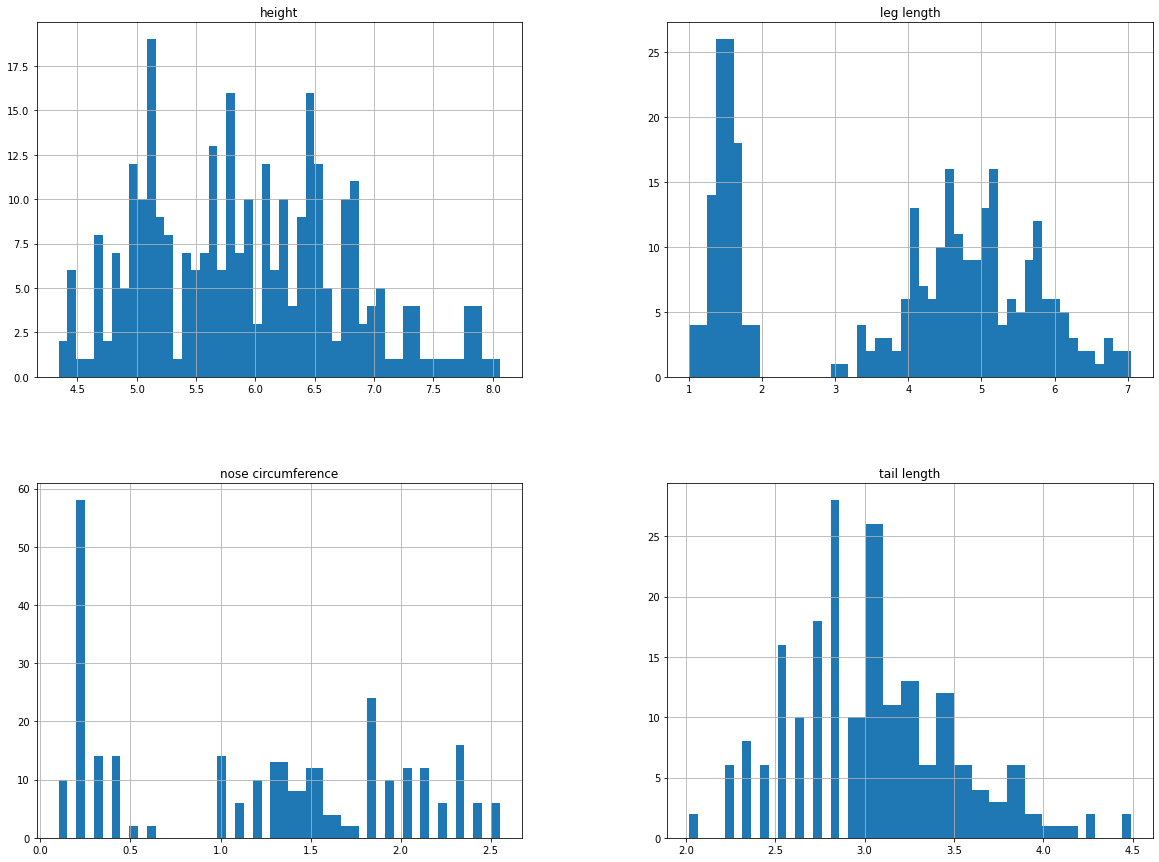

In [30]:
dataframe = pd.read_csv("DMV_CS551G_Assessment1_Task1_dataset.csv")
#dataframe.head(10)
dataframe.hist(bins=50, figsize=(20,15))
plt.show

In [31]:
dataframe.describe()

,height,tail length,leg length,nose circumference
count,300.000000,300.000000,300.00000,300.000000
mean,5.930983,3.103193,3.81437,1.217323
std,0.839601,0.441935,1.78890,0.772409
min,4.343000,2.020000,1.01000,0.101000
25%,5.202000,2.828000,1.61600,0.305250
50%,5.858000,3.060000,4.41500,1.326000
75%,6.528000,3.366000,5.20200,1.836000
max,8.058000,4.488000,7.03800,2.550000


In [0]:
#loading the data in a pandas df
def get_data():
# load the data
    data = pd.read_csv('DMV_CS551G_Assessment1_Task1_dataset.csv',header=0).values
# shuffle data rows
    np.random.shuffle(data) # shuffle rows
    return data
data = get_data()

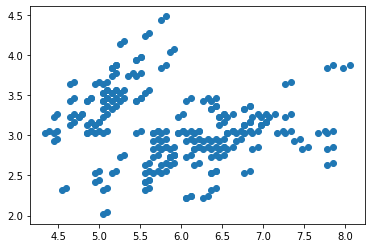

In [33]:
#plt.scatter(data[:,0],data[:,2])
#plt.scatter(data[:,1],data[:,3])
#Features 0 and 1 provide the most interesting plot
plt.scatter(data[:,0],data[:,1])

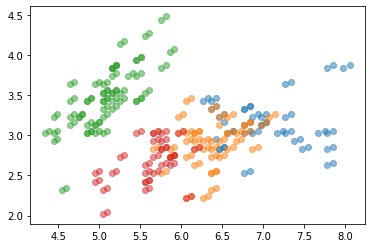

In [38]:
def kmeans_clustering(data, K):
# define the model
    model = KMeans(n_clusters=K,n_init = 100)
# fit the model to data
    model.fit(data)
    labels = model.labels_
# sum of squared distances of samples to their closest cluster centrer
    distance = model.inertia_
# define a dict to store each cluster of data points
    cluster_set = {}
    for i,x in enumerate(data):
        xlabel = labels[i]
        if xlabel not in cluster_set.keys():
            cluster_set[xlabel] = np.reshape(x,(1,len(x)))
        else:
            cluster_set[xlabel] = np.append(cluster_set[xlabel],np.reshape(x,(1,len(x))), axis=0)
    return distance, cluster_set

K=4
distance, clusters_set = kmeans_clustering(data, K)
# plot clusters
plt.figure(1)
colors = {0:'k',1:'b',2:'g'}
center_color = ['r']
for key in clusters_set.keys():
    cluster = clusters_set[key]
    plt.scatter(cluster[:,0],cluster[:,1],alpha=0.5)

Text(0, 0.5, 'aggregate distance')

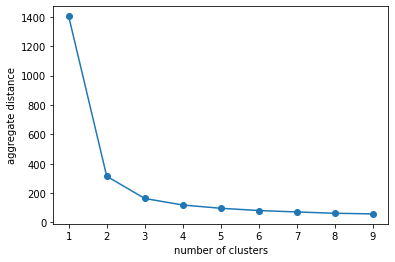

In [39]:
#Plot aggregate distance K=1:9
def agg_distance(data):
    all_distance = []
    for k in range(1,10):
        vector = []
        vector.append(k)
        distance, clusters_set = kmeans_clustering(data, k)
        vector.append(distance)
        all_distance.append(np.array(vector))
    return np.array(all_distance)
                                            
all_distance = agg_distance(data)
plt.figure()
plt.plot(all_distance[:,0],all_distance[:,1],'o-')
plt.xlabel('number of clusters')
plt.ylabel('aggregate distance')


[162.8324438344367, 162.8324438344367, 162.8324438344367, 162.8324438344367]
[118.3350468302562, 118.21583745442003, 118.21583745442003, 118.20796317333048]


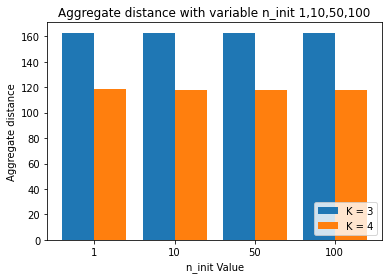

In [45]:
#Tuning N-init
paramList = [1,10,50,100]
data = get_data()
def kmeans_clustering_n_init(data, K):
  distances = []
  for v in range(len(paramList)):
  # define the model
      model = KMeans(n_clusters=K, n_init=paramList[v])
  # fit the model to data
      model.fit(data)
  # sum of squared distances of samples to their closest cluster centrer
      distances.append(model.inertia_)

  return distances

distances3 = kmeans_clustering_n_init(data, 3)
distances4 = kmeans_clustering_n_init(data, 4)
print(distances3)
print(distances4)

#Plotting a diagram of results
N = len(paramList) # this is the number of results we want to plot pn the x-axis
ind = np.arange(N) 

width = 0.40 # width of the bar      
plt.bar(ind, distances3, width, label='K = 3')
plt.bar(ind + width, distances4, width, label='K = 4')

plt.ylabel('Aggregate distance')
plt.xlabel('n_init Value')
plt.title('Aggregate distance with variable n_init 1,10,50,100')

plt.xticks(ind + width / 2, paramList)
plt.legend(loc='lower right')
plt.show()

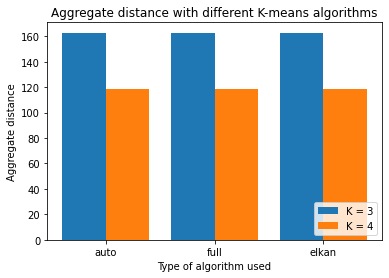

In [0]:
paramList = ['auto', 'full', 'elkan']

def kmeans_clustering_alg(data, K):
  distances = []
  for v in range(len(paramList)):
  # define the model
      model = KMeans(n_clusters = K, algorithm = paramList[v], precompute_distances = True)
  # fit the model to data
      model.fit(data)
      centroid = model.cluster_centers_
  # sum of squared distances of samples to their closest cluster centrer
      distances.append(model.inertia_)
  return distances

distances3 = kmeans_clustering_alg(data, 3)
distances4 = kmeans_clustering_alg(data, 4)
#print(distances3)
#print(distances4)

#Plotting a diagram of results
N = len(distances3) # this is the number of results we want to plot pn the x-axis
ind = np.arange(N) 

width = 0.40 # width of the bar      
plt.bar(ind, distances3, width, label='K = 3')
plt.bar(ind + width, distances4, width, label='K = 4')

plt.ylabel('Aggregate distance')
plt.xlabel('Type of algorithm used')
#plt.ylim(100, 170)
plt.title('Aggregate distance with different K-means algorithms')

plt.xticks(ind + width / 2, paramList)
plt.legend(loc='lower right')
plt.show()


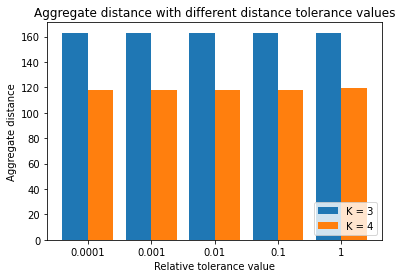

In [50]:
paramList = [0.0001, 0.001, 0.01, 0.1, 1]
def kmeans_clustering_tol(data, K):
  distances = []
  for v in range(len(paramList)):
  # define the model
      model = KMeans(n_clusters = K, tol = paramList[v])
  # fit the model to data
      model.fit(data)
      centroid = model.cluster_centers_
  # sum of squared distances of samples to their closest cluster centrer
      distances.append(model.inertia_)
  return distances

distances3 = kmeans_clustering_tol(data, 3)
distances4 = kmeans_clustering_tol(data, 4)
#print(distances3)
#print(distances4)

#Plotting a diagram of results
N = len(distances3) # this is the number of results we want to plot pn the x-axis
ind = np.arange(N) 

width = 0.40 # width of the bar      
plt.bar(ind, distances3, width, label='K = 3')
plt.bar(ind + width, distances4, width, label='K = 4')

plt.ylabel('Aggregate distance')
plt.xlabel('Relative tolerance value')
#plt.ylim(100, 170)
plt.title('Aggregate distance with different distance tolerance values')

plt.xticks(ind + width / 2, paramList)
plt.legend(loc='lower right')
plt.show()


In [0]:
def calculateDistance(means, clusters):
  distance = 0
  #for each cluster
  for i in clusters.keys():
    #for each member of the cluster
    for point in clusters[i]:
      distance += np.sqrt(sum(np.square(point - means[i])))
  return distance

In [0]:
def em_clustering(data, K):
# define the model
    model = GaussianMixture(n_components = K)
# fit the model to data
    model.fit(data)
    predictions = model.predict(data)
# no inertia in GaussianMixture
# define a dict to store each cluster of data points
    cluster_set_em = {}
    for i,x in enumerate(data):
        xlabel = predictions[i]
        if xlabel not in cluster_set_em.keys():
            cluster_set_em[xlabel] = np.reshape(x,(1,len(x)))
        else:
            cluster_set_em[xlabel] = np.append(cluster_set_em[xlabel],np.reshape(x,(1,len(x))), axis=0)
    return model, cluster_set_em

[204.29620217833445, 187.6777757821139]


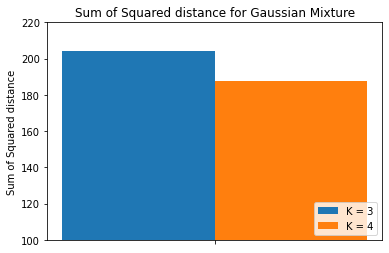

In [80]:
distances = []
paramList = [3, 4]
for v in range(len(paramList)):
  model, clusters_set_em = em_clustering(data, paramList[v])
  # means are not exactly centroids, but this is as close as we can get
  distances.append(calculateDistance(model.means_, clusters_set_em))

print(distances)

#Plotting a diagram of results
N = 1 # this is the number of results we want to plot pn the x-axis
ind = np.arange(N) 

width = 0.40 # width of the bar      
plt.bar(ind, distances[0], width, label='K = 3')
plt.bar(ind + width, distances[1], width, label='K = 4')

plt.ylabel('Sum of Squared distance')
#plt.xlabel('Relative tolerance value')
plt.ylim(100, 220)
plt.title('Sum of Squared distance for Gaussian Mixture')

plt.xticks(ind + width / 2, '')
plt.legend(loc='lower right')
plt.show()

[592.0641981879452, 260.1024938042595, 204.29620217833445, 197.5675279620591, 165.54059313241575, 159.2139020826063, 155.4926973048061, 139.84696926742237, 137.84451204245445]


Text(0, 0.5, 'sum of squared distance')

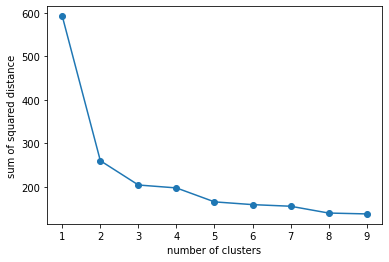

In [85]:
all_distance = []
paramList = [1,2,3,4,5,6,7,8,9]
for v in range(len(paramList)):
  model, clusters_set_em = em_clustering(data, paramList[v])
  # means are not exactly centroids, but this is as close as we can get
  all_distance.append(calculateDistance(model.means_, clusters_set_em))

print(all_distance)
                                            
plt.figure()
plt.plot(paramList,all_distance,'o-')
plt.xlabel('number of clusters')
plt.ylabel('sum of squared distance')

[204.29620217833445, 206.32734568029696, 197.67578092223562, 197.42131495433733]
[197.5675279620591, 197.66879575933032, 171.82469540510286, 170.59823500228035]


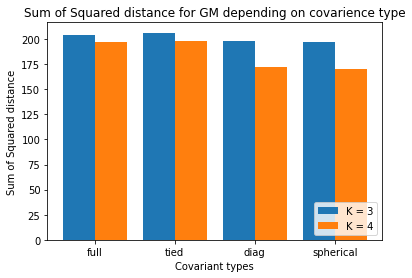

In [91]:
def em_clustering_cov(data, K, param):
# define the model
    model = GaussianMixture(n_components = K, covariance_type = param)
# fit the model to data
    model.fit(data)
    predictions = model.predict(data)
# no inertia in GaussianMixture
# define a dict to store each cluster of data points
    cluster_set_em = {}
    for i,x in enumerate(data):
        xlabel = predictions[i]
        if xlabel not in cluster_set_em.keys():
            cluster_set_em[xlabel] = np.reshape(x,(1,len(x)))
        else:
            cluster_set_em[xlabel] = np.append(cluster_set_em[xlabel],np.reshape(x,(1,len(x))), axis=0)
    return model, cluster_set_em

distances3 = []
distances4 = []
paramList = ['full', 'tied', 'diag', 'spherical']
for param in paramList:
  model, clusters_set_em = em_clustering_cov(data, 3, param)
  # means are not exactly centroids, but this is as close as we can get
  distances3.append(calculateDistance(model.means_, clusters_set_em))

  model, clusters_set_em = em_clustering_cov(data, 4, param)
  # means are not exactly centroids, but this is as close as we can get
  distances4.append(calculateDistance(model.means_, clusters_set_em))

print(distances3)
print(distances4)

#Plotting a diagram of results
N = len(distances3) # this is the number of results we want to plot pn the x-axis
ind = np.arange(N) 

width = 0.40 # width of the bar      
plt.bar(ind, distances3, width, label='K = 3')
plt.bar(ind + width, distances4, width, label='K = 4')

plt.ylabel('Sum of Squared distance')
plt.xlabel('Covariant types')
#plt.ylim(100, 170)
plt.title('Sum of Squared distance for GM depending on covarience type')

plt.xticks(ind + width / 2, paramList)
plt.legend(loc='lower right')
plt.show()

[197.42131495433745, 200.28444647147697]
[170.59823500228043, 170.5898401411552]


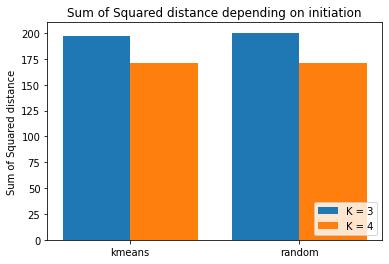

In [96]:
def em_clustering_init(data, K, param):
# define the model
    model = GaussianMixture(n_components = K, covariance_type = 'spherical', init_params = param)
# fit the model to data
    model.fit(data)
    predictions = model.predict(data)
# no inertia in GaussianMixture
# define a dict to store each cluster of data points
    cluster_set_em = {}
    for i,x in enumerate(data):
        xlabel = predictions[i]
        if xlabel not in cluster_set_em.keys():
            cluster_set_em[xlabel] = np.reshape(x,(1,len(x)))
        else:
            cluster_set_em[xlabel] = np.append(cluster_set_em[xlabel],np.reshape(x,(1,len(x))), axis=0)
    return model, cluster_set_em

distances3 = []
distances4 = []
paramList = ['kmeans', 'random']
for param in paramList:
  model, clusters_set_em = em_clustering_init(data, 3, param)
  # means are not exactly centroids, but this is as close as we can get
  distances3.append(calculateDistance(model.means_, clusters_set_em))

  model, clusters_set_em = em_clustering_init(data, 4, param)
  # means are not exactly centroids, but this is as close as we can get
  distances4.append(calculateDistance(model.means_, clusters_set_em))

print(distances3)
print(distances4)

#Plotting a diagram of results
N = len(distances3) # this is the number of results we want to plot pn the x-axis
ind = np.arange(N) 

width = 0.40 # width of the bar      
plt.bar(ind, distances3, width, label='K = 3')
plt.bar(ind + width, distances4, width, label='K = 4')

plt.ylabel('Sum of Squared distance')
plt.xlabel('')
#plt.ylim(100, 170)
plt.title('Sum of Squared distance depending on initiation')

plt.xticks(ind + width / 2, paramList)
plt.legend(loc='lower right')
plt.show()

[197.42131495433745, 197.42131495433733, 197.42131495433733, 197.42131495433733]
[170.9374832503956, 170.64713250621023, 170.786130417874, 170.786130417874]


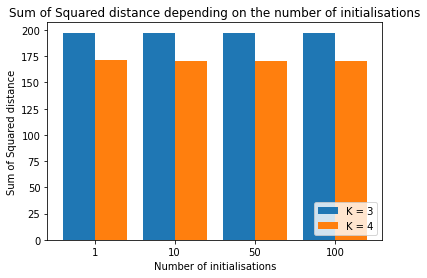

In [102]:
def em_clustering_init(data, K, param):
# define the model
    model = GaussianMixture(n_components = K, covariance_type = 'spherical', n_init = param)
# fit the model to data
    model.fit(data)
    predictions = model.predict(data)
# no inertia in GaussianMixture
# define a dict to store each cluster of data points
    cluster_set_em = {}
    for i,x in enumerate(data):
        xlabel = predictions[i]
        if xlabel not in cluster_set_em.keys():
            cluster_set_em[xlabel] = np.reshape(x,(1,len(x)))
        else:
            cluster_set_em[xlabel] = np.append(cluster_set_em[xlabel],np.reshape(x,(1,len(x))), axis=0)
    return model, cluster_set_em

distances3 = []
distances4 = []
paramList = [1, 10, 50, 100]
for param in paramList:
  model, clusters_set_em = em_clustering_init(data, 3, param)
  # means are not exactly centroids, but this is as close as we can get
  distances3.append(calculateDistance(model.means_, clusters_set_em))

  model, clusters_set_em = em_clustering_init(data, 4, param)
  # means are not exactly centroids, but this is as close as we can get
  distances4.append(calculateDistance(model.means_, clusters_set_em))

print(distances3)
print(distances4)

#Plotting a diagram of results
N = len(distances3) # this is the number of results we want to plot pn the x-axis
ind = np.arange(N) 

width = 0.40 # width of the bar      
plt.bar(ind, distances3, width, label='K = 3')
plt.bar(ind + width, distances4, width, label='K = 4')

plt.ylabel('Sum of Squared distance')
plt.xlabel('Number of initialisations')
#plt.ylim(100, 170)
plt.title('Sum of Squared distance depending on the number of initialisations')

plt.xticks(ind + width / 2, paramList)
plt.legend(loc='lower right')
plt.show()